# 1.0.Telechargement et décompression du dataset sélectionné

In [ ]:
#install Kaggle
!pip install -q kaggle

from google.colab import files
files.upload()

#create kaggle folder
!mkdir ~/.kaggle

#copy kaggle.jason ~/.kaggle
! cp kaggle.json ~/.kaggle

#permission for json to act
! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download vipoooool/new-plant-diseases-dataset
!unzip new-plant-diseases-dataset.zip && rm *.zip #permet de supprimer les zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant disea

#2.Mise en forme des données dans un dataframe



In [ ]:
#Importation des bibliothèques
import pandas as pd
import numpy as np
import os
from PIL import Image
import cv2
import random

# Import des lib pour la partie visualization 
import matplotlib.pyplot as plt
#import seaborn as sns


In [ ]:
df = pd.DataFrame()
for (repertoire, sousRepertoires, fichiers) in os.walk('New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'):
    df_temp = pd.DataFrame(data=fichiers, columns=['fichier'])
    df_temp['dossier'] = repertoire
    df = pd.concat([df, df_temp], axis = 0)

df['chemin_complet'] = df['dossier'] +'/'+ df['fichier']
df['dossier']=df['dossier'].apply(lambda x: x[76:])
df['plante_maladie']=df['dossier'].apply(lambda x: x.split('/')[1])
df['plante']=df['plante_maladie'].apply(lambda x: x.split('___')[0])
df['maladie']=df['plante_maladie'].apply(lambda x: x.split('___')[1])
df = df.drop('dossier', axis=1)
df = df.drop('fichier', axis=1)

print("Dimensions du dataframe: ",df.shape)
df.head()


Dimensions du dataframe:  (87867, 4)


,chemin_complet,plante_maladie,plante,maladie
0,New Plant Diseases Dataset(Augmented)/New Plan...,Grape___Esca_(Black_Measles),Grape,Esca_(Black_Measles)
1,New Plant Diseases Dataset(Augmented)/New Plan...,Grape___Esca_(Black_Measles),Grape,Esca_(Black_Measles)
2,New Plant Diseases Dataset(Augmented)/New Plan...,Grape___Esca_(Black_Measles),Grape,Esca_(Black_Measles)
3,New Plant Diseases Dataset(Augmented)/New Plan...,Grape___Esca_(Black_Measles),Grape,Esca_(Black_Measles)
4,New Plant Diseases Dataset(Augmented)/New Plan...,Grape___Esca_(Black_Measles),Grape,Esca_(Black_Measles)


#3.Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Y'] = encoder.fit_transform(df['plante_maladie'])

df.head()

,chemin_complet,plante_maladie,plante,maladie,Y
0,New Plant Diseases Dataset(Augmented)/New Plan...,Grape___Esca_(Black_Measles),Grape,Esca_(Black_Measles),12
1,New Plant Diseases Dataset(Augmented)/New Plan...,Grape___Esca_(Black_Measles),Grape,Esca_(Black_Measles),12
2,New Plant Diseases Dataset(Augmented)/New Plan...,Grape___Esca_(Black_Measles),Grape,Esca_(Black_Measles),12
3,New Plant Diseases Dataset(Augmented)/New Plan...,Grape___Esca_(Black_Measles),Grape,Esca_(Black_Measles),12
4,New Plant Diseases Dataset(Augmented)/New Plan...,Grape___Esca_(Black_Measles),Grape,Esca_(Black_Measles),12


In [ ]:

X = []
Y = []
largeur = 64
hauteur = 64
profondeur = 1
nb_classes = len(df['plante_maladie'].unique())


for i in range(len(df)):
  #---avec la bibliothèque PIL (PILOW)--- 
  image = Image.open(df.iloc[i]['chemin_complet'])
  image = image.convert('L') # en niveau de gris dans un premier temps  
  image = image.resize((largeur, hauteur))

  X.append(np.array(image))
  Y.append(df.iloc[i]['Y'])

X = np.array(X, dtype='float')
Y = np.array(Y)

X = X.reshape(-1, largeur*hauteur*profondeur) # en niveau de gris dans un premier temps
# Normalisation
X = X / 255

## Visualisation des images transformées

X.shape =  (87867, 4096)
Chemin de l'image:  New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Pepper,_bell___Bacterial_spot/61ec5d27-b456-4164-9bb2-71443e542775___JR_B.Spot 8843_180deg.JPG


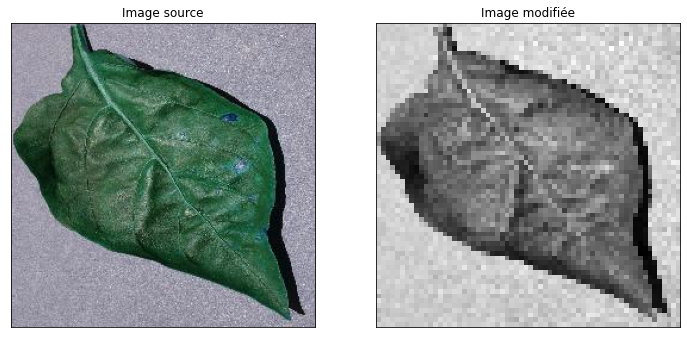

In [ ]:
print('X.shape = ',X.shape)

fig = plt.figure(figsize = (12,12))

#Affichage d'une image aléatoire images aléatoires
rdm = random.randint(0,X.shape[0])
print("Chemin de l'image: ",df.iloc[rdm]['chemin_complet'])
img_scr = cv2.imread(df.iloc[rdm]['chemin_complet'],cv2.IMREAD_COLOR)
img_mod = cv2.imread(df.iloc[rdm]['chemin_complet'], cv2.IMREAD_GRAYSCALE)
img_mod = cv2.resize(img_mod, (64,64))
fig.add_subplot(1,2,1)
plt.imshow(img_scr)
plt.xticks([])
plt.yticks([])
plt.title('Image source')

fig.add_subplot(1,2,2)
plt.imshow(img_mod,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Image modifiée')

plt.show()

## Commentaires sur les transformations des données:
En passant en 64x64 pixel et en niveaux de gris il n'est plus possible même pour un humain de bien dicerner les taches des maladies et de voir les reliefs internes des feuilles. Il faudra retravailler sur le preprocessing au cours des prochains sprints

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [ ]:
X_train.shape

(61506, 4096)

#4.Modélisation avec Regression Logistique

In [ ]:
from sklearn import linear_model, preprocessing
from sklearn.metrics import classification_report

# instanciation et entrainement
clf_rl = linear_model.LogisticRegression(C=1, max_iter=100, n_jobs=-1)
clf_rl.fit(X_train, y_train)
   
y_pred = clf_rl.predict(X_test)

print(classification_report(y_test, y_pred))
#Logistic Regression

              precision    recall  f1-score   support

           0       0.27      0.22      0.24       756
           1       0.29      0.25      0.27       745
           2       0.32      0.27      0.29       660
           3       0.16      0.09      0.11       753
           4       0.19      0.24      0.21       681
           5       0.29      0.34      0.31       631
           6       0.29      0.29      0.29       685
           7       0.35      0.34      0.35       616
           8       0.83      0.92      0.88       715
           9       0.35      0.45      0.39       716
          10       0.36      0.46      0.40       697
          11       0.41      0.43      0.42       708
          12       0.53      0.56      0.54       720
          13       0.47      0.56      0.51       646
          14       0.36      0.42      0.38       635
          15       0.18      0.19      0.18       754
          16       0.32      0.31      0.31       689
          17       0.33    

## Conclusion du modèle Régression Logistique
Avec une accuracy de 0.32, le modèle n'est pas performant du tout.
Cependant, de nombreux plantages mémoire RAM ne nous ont pas permis de chercher les meilleurs hyperparamètres.

#5.Modélisation avec Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=-1, random_state=123)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
#Random Forest

              precision    recall  f1-score   support

           0       0.49      0.44      0.46       756
           1       0.67      0.63      0.65       745
           2       0.65      0.55      0.59       660
           3       0.43      0.45      0.44       753
           4       0.64      0.64      0.64       681
           5       0.45      0.42      0.43       631
           6       0.61      0.84      0.71       685
           7       0.65      0.50      0.57       616
           8       0.98      0.99      0.99       715
           9       0.47      0.72      0.57       716
          10       0.65      0.69      0.67       697
          11       0.52      0.60      0.56       708
          12       0.65      0.75      0.70       720
          13       0.63      0.60      0.61       646
          14       0.66      0.78      0.71       635
          15       0.55      0.64      0.59       754
          16       0.45      0.51      0.48       689
          17       0.71    

## Conclusion du modèle Random forest
Même si un modèle RandomForest peut réaliser de la classification d'images simples (ex : MNIST), il n'est pas très performant sur notre jeu de données (accuracy de 0.57).

#6.Conclusion

Les deux modèles de machine learning testés ne sont pas performants.
C'est une base de comparaison pour les futurs modèles. Il y a clairement besoin d'aller plus loin dans la modélisation:
- Travailler sur les données d'entrées et les tranformations
- Utiliser des modèles plus performants et plus adaptés à ce type de classification tel que du Deep Learning